### Chi-square test

The chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. It is a non-parametric test that compares the observed frequencies in a contingency table with the frequencies that would be expected if the variables were independent.

The chi-squared test statistic, denoted as $(X^2)$, is calculated using the following formula:

$[ X^2 = \sum \frac{(O_i - E_i)^2}{E_i} ]$

Where:
- Observed Frequencies $(O_i)$.
  - These are the actual counts or occurrences observed in the data. In the chi-squared test, you compare these observed counts to what you would expect based on a theoretical distribution.

- Expected Frequencies $(E_i)$.
  - For a continuous distribution, the expected frequencies are often calculated based on a theoretical distribution. In this example, since we're dealing with the sum of squares of standard normal 
  variables, we expect the resulting distribution to follow a chi-squared distribution.
- Calculation of the Statistic:
  - For each category or bin, you take the square of the difference between the observed and expected counts.
  - You then divide this squared difference by the expected count for that category.
  - This process is done for each category, and the results are summed up.
  
This formula is often used in the context of contingency tables where we compare observed frequencies ($O_i$) with expected frequencies ($E_i$) under a specific hypothesis. The test assesses whether there is a significant difference between the observed and expected frequencies, considering the variability.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [15]:
# Example dataset
data = {"Variable_1": [1.5, -0.8], "Variable_2": [0.7, -1.2]}
df = pd.DataFrame(data)

# Calculate chi-squared variable X for each row
df["X"] = df["Variable_1"] ** 2 + df["Variable_2"] ** 2

# Display the dataset with the chi-squared variable
df

,Variable_1,Variable_2,X
0,1.5,0.7,2.74
1,-0.8,-1.2,2.08


In [16]:
# Generate a larger dataset with random values
np.random.seed(42)
data = {
    "variable_1": np.random.normal(0, 1, 1000),
    "variable_2": np.random.normal(0, 1, 1000),
}
df = pd.DataFrame(data)

# Calculate chi-squared variable X for each row
df["X"] = df["variable_1"] ** 2 + df["variable_2"] ** 2

# Display the dataset with the chi-squared variable
df.head()

,variable_1,variable_2,X
0,0.496714,1.399355,2.204921
1,-0.138264,0.924634,0.874064
2,0.647689,0.059630,0.423056
3,1.523030,-0.646937,2.738147
4,-0.234153,0.698223,0.542344


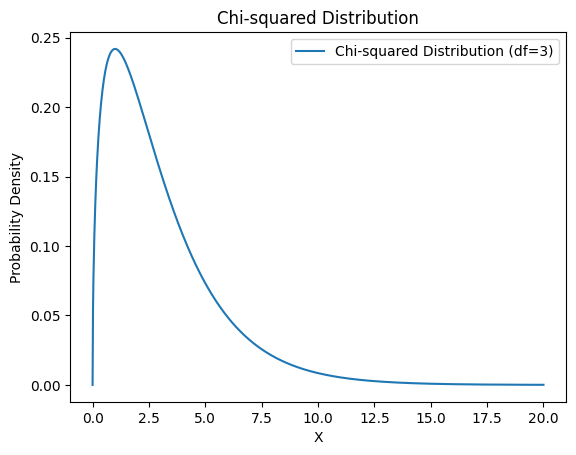

Chi-squared Statistic: 15.041666666666666
P-value: 0.00010516355403363098
Reject the null hypothesis: There is a significant relationship.


In [6]:
# Example 1: Plotting Chi-squared Distribution
df = 3  # Degrees of freedom
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df)

plt.plot(x, y, label=f"Chi-squared Distribution (df={df})")
plt.title("Chi-squared Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Example 2: Chi-squared Test (Contingency Table)
# Create a 2x2 contingency table
observed = np.array([[30, 10], [20, 40]])

# Perform Chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(observed)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

In [7]:
import pandas as pd
import numpy as np

# Generate a larger dataset with random values
np.random.seed(42)
data = {
    "Variable_1": np.random.normal(0, 1, 1000),
    "Variable_2": np.random.normal(0, 1, 1000),
}
df = pd.DataFrame(data)

# Calculate chi-squared variable X for each row
df["X"] = df["Variable_1"] ** 2 + df["Variable_2"] ** 2

# Display the dataset with the chi-squared variable
print(df.head())

# Calculate the observed frequencies (assuming binning)
observed_frequencies, _ = np.histogram(
    df["X"], bins=10
)  # Adjust the number of bins as needed

# Expected frequencies based on chi-squared distribution
expected_frequencies = np.histogram(np.random.chisquare(2, 1000), bins=10)[
    0
]  # Chi-squared with 2 degrees of freedom

# Apply the chi-squared formula
chi_squared_value = np.sum(
    (observed_frequencies - expected_frequencies) ** 2 / expected_frequencies
)

# Display the results
print(f"Observed Frequencies: {observed_frequencies}")
print(f"Expected Frequencies: {expected_frequencies}")
print(f"Chi-Squared Value: {chi_squared_value}")

   Variable_1  Variable_2         X
0    0.496714    1.399355  2.204921
1   -0.138264    0.924634  0.874064
2    0.647689    0.059630  0.423056
3    1.523030   -0.646937  2.738147
4   -0.234153    0.698223  0.542344
Observed Frequencies: [604 223 105  43  18   5   1   0   0   1]
Expected Frequencies: [492 256 129  54  36  22   3   3   4   1]
Chi-Squared Value: 66.92539519885707


Contingency Table:
dislike_chocolate   No  Yes
like_chocolate             
No                 281  106
Yes                423  190
Fail to reject the null hypothesis. The distribution is consistent with expectations.


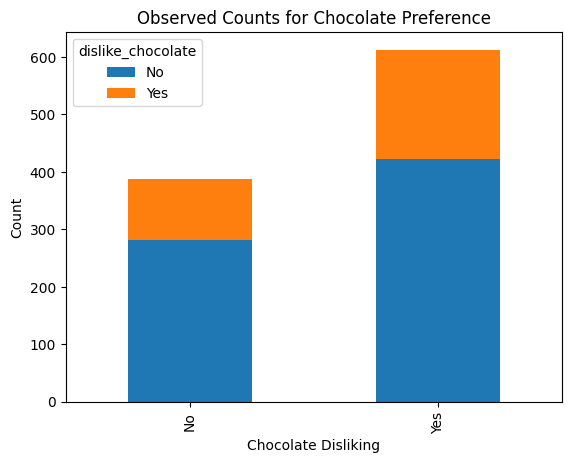

In [13]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000
like_chocolate = np.random.choice(["Yes", "No"], size=num_samples, p=[0.6, 0.4])
dislike_chocolate = np.random.choice(["Yes", "No"], size=num_samples, p=[0.3, 0.7])

# Create a DataFrame
data = {"like_chocolate": like_chocolate, "dislike_chocolate": dislike_chocolate}
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df["like_chocolate"], df["dislike_chocolate"])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Compare p-value with significance level (e.g., 0.05)
if p < 0.05:
    print("Reject the null hypothesis. The distribution is not as expected.")
else:
    print(
        "Fail to reject the null hypothesis. The distribution is consistent with expectations."
    )

# Plot the observed counts
contingency_table.plot(kind="bar", stacked=True)
plt.title("Observed Counts for Chocolate Preference")
plt.xlabel("Chocolate Disliking")
plt.ylabel("Count")
plt.show()

Contingency Table:
dislike_chocolate   No  Yes
like_chocolate             
No                 281  106
Yes                423  190
Fail to reject the null hypothesis. The distribution is consistent with expectations.


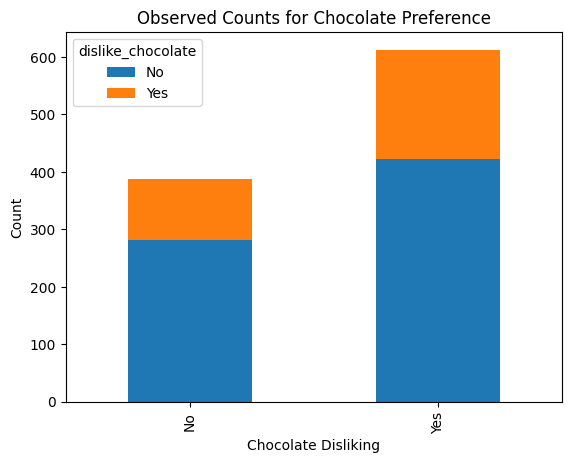

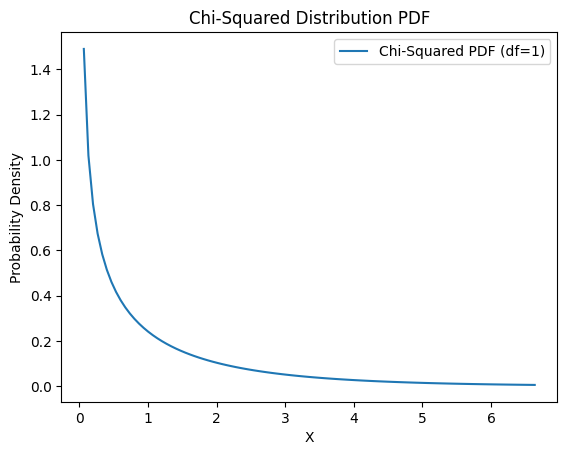

In [35]:
np.random.seed(42)

num_samples = 1000
like_chocolate    = np.random.choice(["Yes", "No"], size=num_samples, p=[0.6, 0.4])
dislike_chocolate = np.random.choice(["Yes", "No"], size=num_samples, p=[0.3, 0.7])

df = pd.DataFrame(
    {"like_chocolate": like_chocolate, "dislike_chocolate": dislike_chocolate}
)

# Create a contingency table using groupby
contingency_table = (
    df.groupby(["like_chocolate", "dislike_chocolate"]).size().unstack(fill_value=0)
)

# Perform the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Compare p-value with significance level (e.g., 0.05)
if p_val < 0.05:
    print("Reject the null hypothesis. The distribution is not as expected.")
else:
    print(
        "Fail to reject the null hypothesis. The distribution is consistent with expectations."
    )

# Plot the observed counts
contingency_table.plot(kind="bar", stacked=True)
plt.title("Observed Counts for Chocolate Preference")
plt.xlabel("Chocolate Disliking")
plt.ylabel("Count")
plt.show()

# Plot the PDF of the chi-squared distribution
rows, columns = contingency_table.shape
degrees_of_freedom = (rows - 1) * (columns - 1)


x = np.linspace(0, chi2.ppf(0.99, degrees_of_freedom), 100)
plt.plot(
    x,
    chi2.pdf(x, degrees_of_freedom),
    label=f"Chi-Squared PDF (df={degrees_of_freedom})",
)
plt.title("Chi-Squared Distribution PDF")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.show()